In [167]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

figure有一些选项，figsize 大小和纵横比

In [168]:
# 获取当前figure的引用
# plt.gcf()

In [169]:
# figure不能直接绘图，绘图需要用add_subplot创建一个或多个subplot才行
# 在两行两列的四个ax中，选中第一个（变号从1开始）
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[1,2,3])
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
# 此时发出绘图命令，就会在最后一个用过的subplot中绘图
ax3.plot(np.random.randn(50).cumsum(),'k--')
plt.show()


k-- 是一个线性选项，告诉plt 绘制黑色虚线，fig.add_subplot返回的是axessubplot对象

直接调用其实例方法就可以在其表示的格子中画图了

In [170]:
ax1.hist(np.random.randn(100),bins=10,color='k',alpha=0.3)

(array([ 2.,  7., 11., 15., 18., 17., 16.,  8.,  5.,  1.]),
 array([-2.2474473 , -1.77049606, -1.29354482, -0.81659358, -0.33964234,
         0.1373089 ,  0.61426014,  1.09121138,  1.56816262,  2.04511386,
         2.5220651 ]),
 <a list of 10 Patch objects>)

In [171]:
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
plt.show()

根据特定的布局创建figure 和 subplot 是一个非常常见的任务，于是出现了一个更为方便的方法 plt.subplts,可以创建一个新的figure，返回一个还有已创建的subplot对象的numpy数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FFC4F1C18>,
      dtype=object)

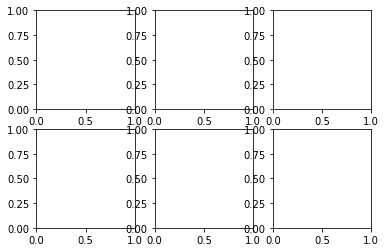

In [172]:
fig,axes = plt.subplots(2,3)
axes

In [173]:
# 可通过axes[i,j]获取目标axes
axes[1,1]

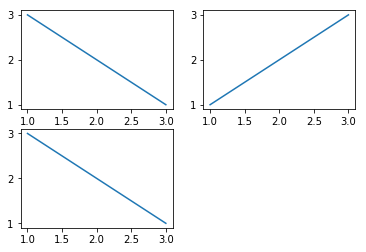

In [174]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[3,2,1])
ax2 = fig.add_subplot(222)
ax2.plot([1,2,3],[1,2,3])
ax3 = fig.add_subplot(223)
ax3.plot([1,2,3],[3,2,1])
plt.show()

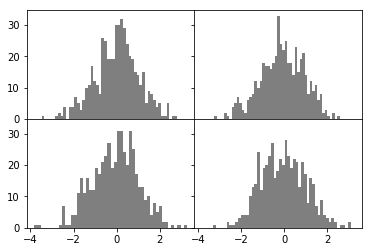

In [175]:
# wspach和hspace是控制高度和宽度的百分比，用作subplot之间的间距
# 下面将间距收到0
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

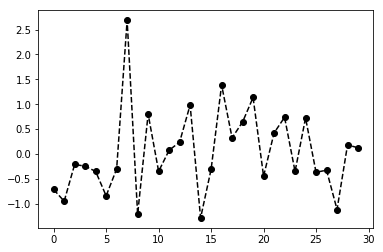

In [176]:
plt.plot(np.random.randn(30),color='k', linestyle='dashed', marker='o')

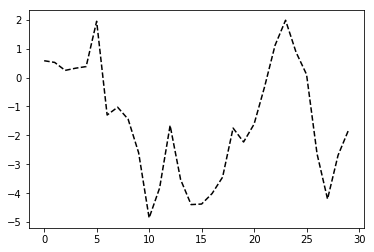

In [177]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--', label='Default')

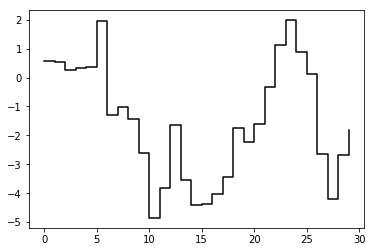

In [178]:
plt.plot(data,'k-', drawstyle='steps-post')

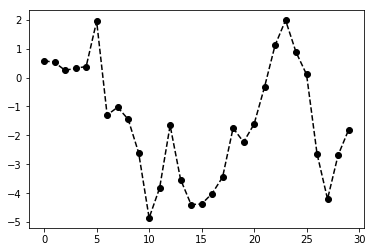

In [179]:
plt.plot(data,color='k', linestyle='dashed', marker='o')

(0.0, 1.0)

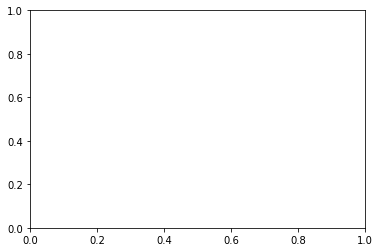

In [180]:
plt.xlim()

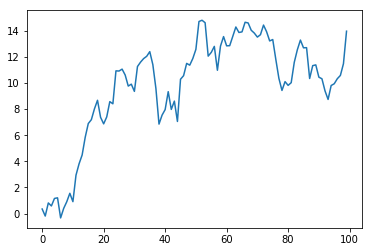

In [181]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
# 在坐标轴上绘图
ax.plot(np.random.randn(100).cumsum())

要修改x轴的刻度，最简单的办法是使用set_xticks和set_xticklabels

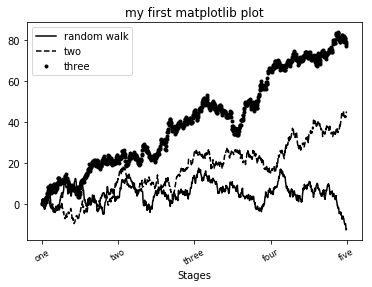

In [182]:
# 创建一个随机漫步
# 创建画板
fig = plt.figure()
# 创建绘图区
ax = fig.add_subplot(1,1,1)
# 设置刻度值
ticks = ax.set_xticks([0,250,500,750,1000])
# 设置刻度值对应表示
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
# 设置标题
ax.set_title('my first matplotlib plot')
# 设置x轴标签
ax.set_xlabel('Stages')
# label是对应图线的标签，后面需要添加legend函数才能显示出来
ax.plot(np.random.randn(1000).cumsum(),'k',label='random walk')
# ax.legend()或plt.legend()


ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')

ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')


ax.legend()

(600, 1800)

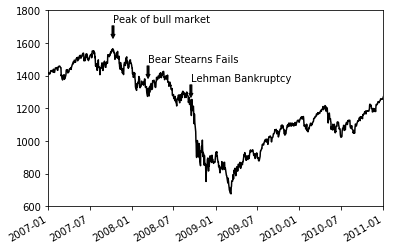

In [183]:
from datetime import datetime
import pandas as pd


fig = plt.figure()
ax = fig.add_subplot(111)




data = pd.read_csv('./spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']



crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy') ]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
                horizontalalignment='left', verticalalignment='top')
    


    
    
    
spx.plot(ax=ax,style='k-')

# 轴的缩放需放在绘图函数之后
# Zoom in on 2007-2010 
ax.set_xlim(['1/1/2007', '1/1/2011']) 
ax.set_ylim([600, 1800])

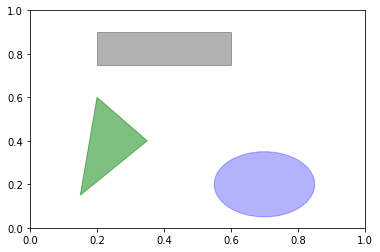

In [184]:
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)

ax.add_patch(rect) 
ax.add_patch(circ) 
ax.add_patch(pgon)

In [185]:
# 将图表保存到文件
# 利用plt.savefig 可将当前图表保存到文件
# 该方法相当于figure实例方法 savefig
# 例：将图表保存为svg图形
plt.savefig('./fig_test.jpg')

<Figure size 432x288 with 0 Axes>

In [186]:
fig.savefig('./fig_test.jpg')

pandas绘图

In [187]:
import pandas as pd

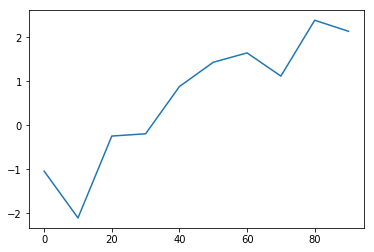

In [188]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
#  Series object’s index is passed to matplotlib for plotting on the x-axis
#  disable this by passing use_index=False
s.plot()

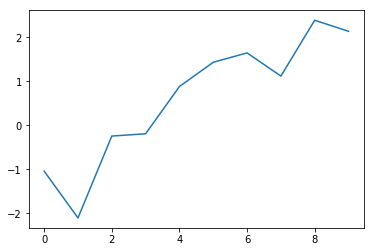

In [189]:
s.plot(use_index=False)

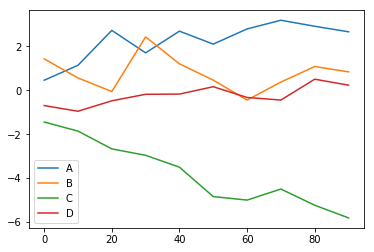

In [192]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

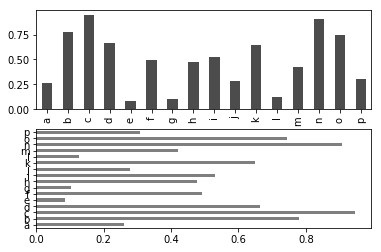

In [194]:
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='k', alpha=0.5)

In [195]:
data

a    0.258936
b    0.778937
c    0.947043
d    0.664408
e    0.084629
f    0.491530
g    0.103769
h    0.478309
i    0.529022
j    0.279143
k    0.648734
l    0.125838
m    0.421898
n    0.908906
o    0.742911
p    0.308533
dtype: float64

In [198]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.654920,0.266255,0.240536,0.728566
two,0.133819,0.587877,0.739531,0.813920
three,0.052354,0.683215,0.275638,0.272895
four,0.669792,0.955640,0.651783,0.637709
five,0.483585,0.563594,0.531367,0.912491
six,0.715706,0.581392,0.808408,0.566735


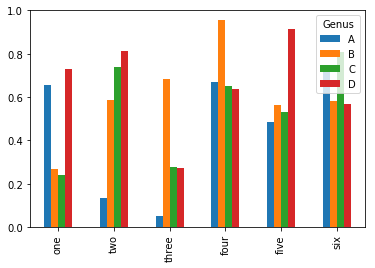

In [199]:
df.plot.bar()

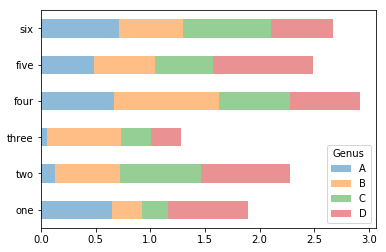

In [201]:
df.plot.barh(stacked=True,alpha=0.5)

In [214]:
tips = pd.read_csv('./tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [209]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


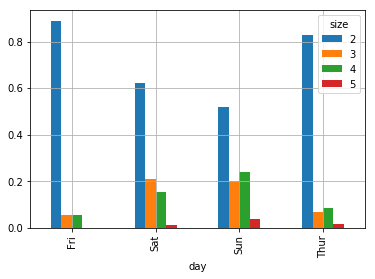

In [213]:
party_counts = party_counts.loc[:,2:5]
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts.plot.bar(grid=True)